In [19]:
# -*- coding: UTF-8 -*-
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
# load数据
titanic_df = pd.read_csv("kaggle/Titanic/data/train.csv")
test_df = pd.read_csv("kaggle/Titanic/data/test.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
'''
打印表格的信息，可看到
有多少列
有多少空字段
各列数据类型
'''
titanic_df.info()
print "-------------------------"
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare   

In [24]:
#舍弃没有用的列
titanic_df = titanic_df.drop(['PassengerId', 'Name',  'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


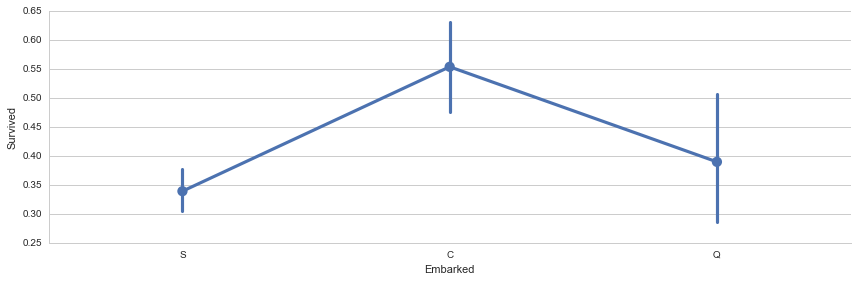

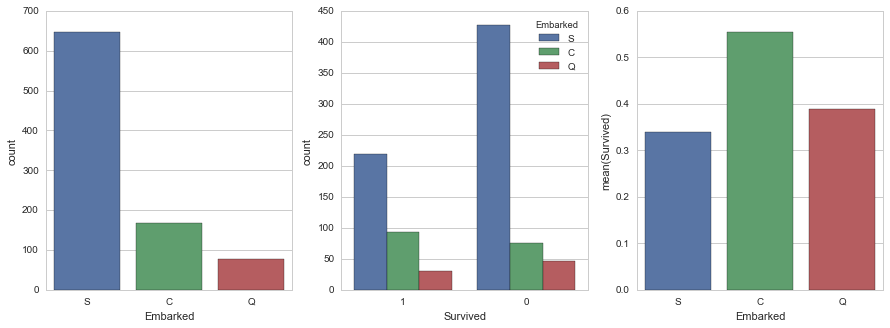

In [38]:
#给Embarked填上众数S
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")

# 查看某一个特征的各个值的结果平均值
seaborn.factorplot(x='Embarked',y='Survived', data=titanic_df, size=4, aspect=3)

# 表示接下来有3个表格axis1,2,3
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# 显示embarked各个值的数量
seaborn.countplot(x='Embarked', data=titanic_df, ax=axis1)
# embarked在survived取不同值时的分布情况
seaborn.countplot(x='Survived', hue='Embarked', data=titanic_df, order=[1,0], ax=axis2)
# 按embarked分组,求出每个embarked值的均值
embarked_perc = titanic_df[['Survived', 'Embarked']].groupby(['Embarked'], as_index=False).mean()
seaborn.barplot(x='Embarked', y='Survived', data=embarked_perc, order=['S', 'C', 'Q'], ax=axis3)

In [ ]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

titanic_df.info()